# Decision Tree 

Decision tree algorithm is a non-parametric data modelling algorithm that basically uses divide-and-conquer strategy. It is a classification algorithm so it is also called <b>Classification Tree</b>. Decision trees are used to separate the dataset into classes belonging to the response variable.
<br>A decision tree is formed of two types of nodes: <br> 1- Decision functions which returns yes or no as output <br> 2-  Leaves which are terminal nodes.<br>

Simple decision tree example where <b>Xi's</b> are attributes and <b>Ci's</b> are classes:
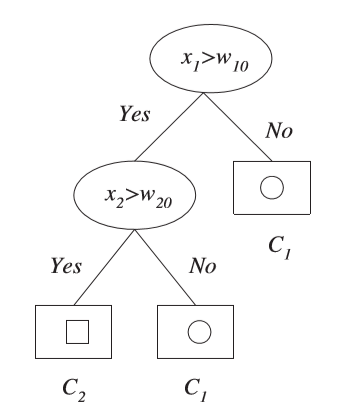
(source: The Elements of Statistical Learning - Robert Tibshirani)

Imagine we have data of 14 days that shows weather conditions and the Golf Player's decision of play, shown below:

In [17]:
import pandas as pd
pd.read_csv("golfy.csv",delimiter=";")

,Outlook,Humidity,Wind,Play
0,sunny,high,weak,no
1,sunny,high,strong,no
2,overcast,high,weak,yes
3,rain,high,weak,yes
4,rain,normal,weak,yes
5,rain,normal,strong,no
6,overcast,normal,strong,yes
7,sunny,high,weak,no
8,sunny,normal,weak,yes
9,rain,normal,weak,yes


Assume that we are trying to predict whether the player is going to play or not on 15th day if the weather is <br><b>Outlook:</b> Rain <br> <b>Humidity:</b> High <br> <b>Wind:</b> Weak  

To build the tree, we need to use the core algorithm of decision tree which does most of the divide-and-conquer job.<br> That algorithm is called <b>ID3 (Iterative Dichotomiser 3). </b>Developed by J. R. Quinlan. <br>ID3 algorithm helps us find which attribute is more informative and then split if necessary. <br>
<h3>Steps of ID3 Algorithm:</h3> <br>
1 - Find the most informative attribute of the data, call it decision attribute and make it the root node <br>
2 - Split it and create new child nodes for each value of decision attribute <br>
3 - Distribute the training data to child nodes <br>
4 - For each child node: <br>
    if, subset is <b>pure</b> : STOP <br>
    else, create new node from child nodes.
<hr>

<h2>How do we find the most informative attribute ?</h2>

As we are going to split the most informative attribute first, as the root node, the basic idea is, somehow we need to measure the purity of the subset which we obtained by splitting that attribute. So ideally, we need to pick such an attribute that has purest subsets. Suppose we are looking into a particular subset, after we have splited the data, how uncertain we are whether a random item from that subset is positive or negative?

For example:
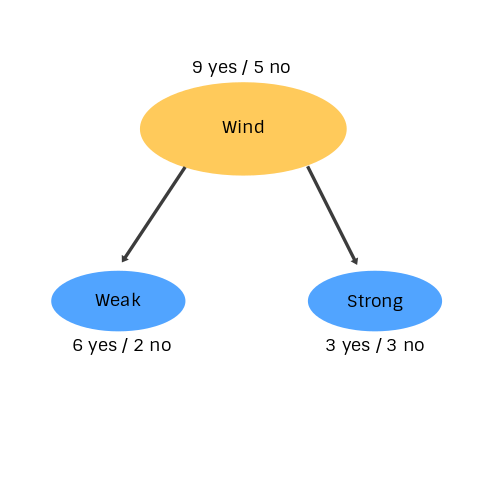 consider the attribute <b>Wind</b> as the root node, the days when wind is weak, player played golf on 6 of those days and didn't play on 2 of those days. When wind is strong, it is 3 days of yes and 3 days of no which is a complete uncertainity. Subsets are not pure as seen. But how do we measure purity?

<h2>Entropy</h2>

It is a way to measure the uncertainity (or purity) of a class in a subset of examples. Entropy denoted by E (and sometimes H) gives a number between 0 and 1, where 0 is certain and 1 is totally uncertain.

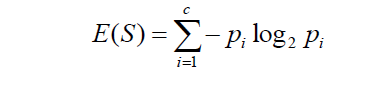

Where <b>Pi</b> is the probability of a class in the data. <br> <b>S:</b> Subset of training examples. <br> <b> C:</b> Classes <br> So, if we go back to the subsets we obtained from Wind attribute, entropy of <b>weak wind</b> subset is:

$$ -\dfrac{6}{8}log_2\dfrac{6}{8} - \dfrac{2}{8}log_2\dfrac{2}{8}\approx0,80$$ <br><br>where 6 yes / 2 no on the days where wind is weak. Entropy of <b>strong wind</b> subset is: <br><br> <br>
$$ -\dfrac{3}{6}log_2\dfrac{3}{6} - \dfrac{3}{6}log_2\dfrac{3}{6}=1$$

Graph of Entropy: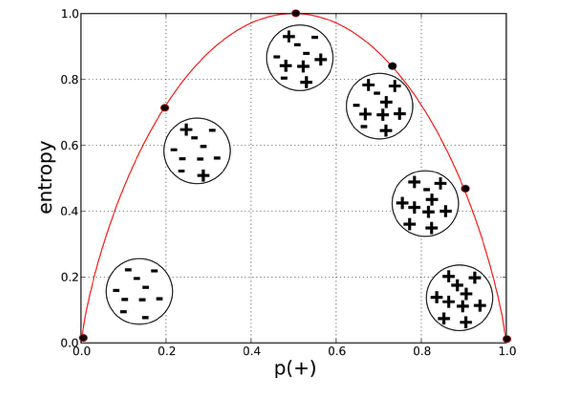 (source: Data Science for Business - Foster Provost & Tom Fawcett) 

After calculating Entropy of subsets, we need to decide which attribute is informative most. This is where we need to use <b>Information Gain </b> formula:

$$Gain(T,X) = E(T) - E(T,X)$$

where X stands for attributes and T is the target set. If we go back to our example, we need to calculate all three Information Gain for each attributes and then decide our root node with the highest Information Gain:<br><br>
$$Gain(Play,Outlook) = E(Play) - E(Play,Outlook)$$ <br>
$$Gain(Play,Humidity) = E(Play) - E(Play,Humidity)$$ <br>
$$Gain(Play,Wind) = E(Play) - E(Play,Wind)$$<br>

Let's calculate the <b>Information Gain</b> for the <b>Wind</b> attribute to visualize the step:<br><br>$$Gain(Play,Wind) = E(Play) - E(Play,Wind)$$<br><br>
$$\fbox{$E(Play) = -\dfrac{5}{14}log_2\dfrac{5}{14} - \dfrac{9}{14}log_2\dfrac{9}{14}\approx 0,94$}$$ <br><br>
$$E(Play, Wind) = P(Wind_{Weak})\times E(Wind_{Weak}) + P(Wind_{Strong})\times E(Wind_{Strong}) $$ <br><br>
$$ \fbox{$E(Play,Wind) = \dfrac{8}{14}\times 0,80 + \dfrac{6}{14}\times 1\approx 0,88$}$$<br><br>
$$\fbox{$Gain(Play,Wind) = 0,94 - 0,88 = 0.06$}$$

The attribute with the highest Gain is going to be the root node of the tree. If we calculate the Information Gain for all the attributes in our example, we can see that <b>Outlook</b> attribute has the largest Information Gain. So it is going to be the root node. When we complete the steps of ID3 algorithm, we would have a tree like below:

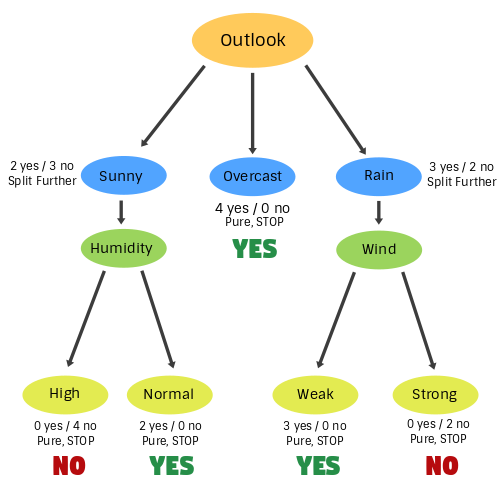

After creating the tree, let's recall what we are trying to predict:
<br><b>Outlook:</b> Rain <br> <b>Humidity:</b> High <br> <b>Wind:</b> Weak <br><b>Play :</b> ? <br>
We can see that our data has a path root node through a terminal leaf:<br> <b>Outlook</b> --> <b>Rain</b> --> <b>Weak</b> --> <b>Play : YES</b>